<a href="https://colab.research.google.com/github/TiagoSpiandorello/Analise_de_portfolio_de_acoes/blob/main/analise_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
# Importação das bibliotecas necessárias para o projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [227]:
# Extração dos dados de um portfólio de ações do site Yahoo Finance

# PETR4 = Petrobras
# BBDC4 = Bradesco
# ABEV3 = AMBEV
# WEGE3 = Weg
# VALE3 - Vale

tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA']
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

bolsas.tail(10)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2021-06-08,28.660000,28.240000,19.590000,34.020000,109.919998
2021-06-09,28.660000,28.100000,19.309999,34.250000,112.199997
2021-06-10,28.680000,28.150000,19.320000,33.930000,111.830002
2021-06-11,28.570000,28.040001,18.940001,34.209999,114.339996
2021-06-14,28.750000,27.920000,19.480000,34.880001,113.720001
2021-06-15,29.030001,27.940001,19.129999,35.459999,111.500000
2021-06-16,29.139999,28.080000,19.090000,34.830002,108.150002
2021-06-17,28.129999,27.959999,19.010000,34.419998,105.900002
2021-06-18,28.190001,27.450001,18.760000,35.080002,108.730003


# Taxa de retorno das ações

## taxa de retorno simples = (preço final - preço inicial) / preço inicial

## taxa de retorno logarítmica = log preço final / log preço inicial

In [228]:
# Cálculo da taxa de retorno logarítmica das ações

retorno = np.log(bolsas / bolsas.shift(1))
retorno

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008611,-0.004968,0.005865,-0.002185,0.009279
2010-01-06,0.013423,-0.008032,0.010150,0.005453,0.020945
2010-01-07,-0.009377,-0.002691,0.004684,0.016717,0.004137
2010-01-08,-0.005398,-0.001079,-0.001923,0.035718,0.009711
...,...,...,...,...,...
2021-06-15,0.009692,0.000716,-0.018131,0.016492,-0.019715
2021-06-16,0.003782,0.004998,-0.002093,-0.017926,-0.030505
2021-06-17,-0.035275,-0.004283,-0.004199,-0.011841,-0.021024


In [229]:
retorno['PETR4.SA'].mean()

9.971017593797104e-06

In [230]:
retorno['BBDC4.SA'].mean()

0.00033263975498928395

In [231]:
retorno['ABEV3.SA'].mean()

0.0005278081558887982

In [232]:
retorno['WEGE3.SA'].mean()

0.000986433582373584

In [233]:
retorno['VALE3.SA'].mean()

0.00043444135489962595

In [234]:
retorno['PETR4.SA'].std()

0.029974969173161572

In [235]:
retorno['BBDC4.SA'].std()

0.021767062227298354

In [236]:
retorno['ABEV3.SA'].std()

0.01672039180640203

In [237]:
retorno['WEGE3.SA'].std()

0.02000204500302843

In [238]:
retorno['VALE3.SA'].std()

0.026586085006656907

In [239]:
LOGN_var = retorno['PETR4.SA'].var()
LOGN_var

0.0008984987769319866

In [240]:
VVAR_var = retorno['BBDC4.SA'].var()
VVAR_var

0.0004738049980070788

In [241]:
LOGG_var = retorno['ABEV3.SA'].var()
LOGG_var

0.00027957150215959613

In [242]:
MRFG_var = retorno['WEGE3.SA'].var()
MRFG_var

0.0004000818043031747

In [243]:
TRIS_var = retorno['VALE3.SA'].var()
TRIS_var

0.0007068199159811871

## Covariância

cov > 0 => variáveis se movem na mesma direção

cov < 0 => variáveis se movem em direções opostas

cov = 0 => variáveis são independentes

In [244]:
cov_matrix = bolsas.cov()
cov_matrix

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,33.649399,20.605497,-4.965914,21.814552,75.714303
BBDC4.SA,20.605497,46.562959,20.642447,39.145635,76.645354
ABEV3.SA,-4.965914,20.642447,20.377221,14.311558,10.695243
WEGE3.SA,21.814552,39.145635,14.311558,87.850691,142.802025
VALE3.SA,75.714303,76.645354,10.695243,142.802025,348.003576


In [245]:
cov_matrix = retorno.cov()
cov_matrix

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,0.000898,0.000380,0.000170,0.000181,0.000378
BBDC4.SA,0.000380,0.000474,0.000159,0.000149,0.000227
ABEV3.SA,0.000170,0.000159,0.000280,0.000112,0.000121
WEGE3.SA,0.000181,0.000149,0.000112,0.000400,0.000128
VALE3.SA,0.000378,0.000227,0.000121,0.000128,0.000707


## Correlação

corr = 1 => correlação perfeita

corr > 0 => variáveis se movem na mesma direção

corr = -1 => correlação perfeitamente negativa

corr < 0 => variáveis se movem em direções opostas

corr = 0 => variáveis absolutamente independentes

In [246]:
corr_matrix = retorno.corr()
corr_matrix

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,1.000000,0.582892,0.339493,0.302409,0.474692
BBDC4.SA,0.582892,1.000000,0.436888,0.343042,0.391549
ABEV3.SA,0.339493,0.436888,1.000000,0.334617,0.272183
WEGE3.SA,0.302409,0.343042,0.334617,1.000000,0.240107
VALE3.SA,0.474692,0.391549,0.272183,0.240107,1.000000


<function matplotlib.pyplot.show>

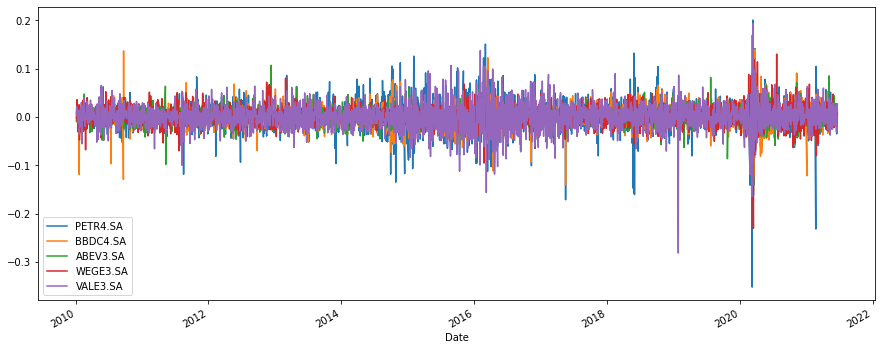

In [247]:
retorno.plot(figsize = (15, 6));
plt.show

In [248]:
corr_matrix = bolsas.corr()
corr_matrix

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,1.000000,0.520564,-0.189644,0.401222,0.699677
BBDC4.SA,0.520564,1.000000,0.670144,0.612055,0.602107
ABEV3.SA,-0.189644,0.670144,1.000000,0.338253,0.127007
WEGE3.SA,0.401222,0.612055,0.338253,1.000000,0.816714
VALE3.SA,0.699677,0.602107,0.127007,0.816714,1.000000


<function matplotlib.pyplot.show>

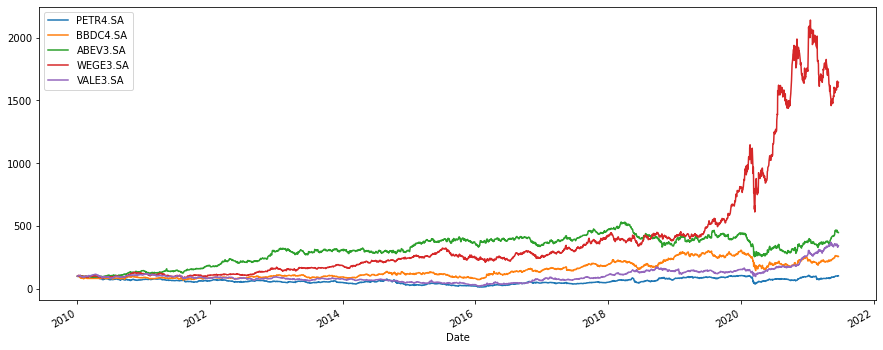

In [249]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

# Otimização de Portfólio de Markowitz

In [250]:
retorno.mean() * 250

PETR4.SA    0.002493
BBDC4.SA    0.083160
ABEV3.SA    0.131952
WEGE3.SA    0.246608
VALE3.SA    0.108610
dtype: float64

In [251]:
retorno.cov() * 250

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,0.224625,0.095080,0.042538,0.045328,0.094573
BBDC4.SA,0.095080,0.118451,0.039752,0.037339,0.056647
ABEV3.SA,0.042538,0.039752,0.069893,0.027977,0.030248
WEGE3.SA,0.045328,0.037339,0.027977,0.100020,0.031921
VALE3.SA,0.094573,0.056647,0.030248,0.031921,0.176705


In [252]:
retorno.corr()

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,1.000000,0.582892,0.339493,0.302409,0.474692
BBDC4.SA,0.582892,1.000000,0.436888,0.343042,0.391549
ABEV3.SA,0.339493,0.436888,1.000000,0.334617,0.272183
WEGE3.SA,0.302409,0.343042,0.334617,1.000000,0.240107
VALE3.SA,0.474692,0.391549,0.272183,0.240107,1.000000


In [253]:
num_tickers = len(tickers)
num_tickers

5

In [254]:
weights = np.random.random(num_tickers)
weights /= np.sum(weights)
weights

array([0.38716457, 0.04749701, 0.31300753, 0.08989715, 0.16243375])

In [255]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4]

1.0

# Retorno esperado do Portfólio

In [256]:
np.sum(weights * retorno.mean()) * 250

0.08602831177364657

# Variância esperada do Portfólio

In [257]:
np.dot(weights.T, np.dot(retorno.cov() *250, weights))

0.0830706045830674

# Volatilidade esperada do Portfólio

In [258]:
np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights)))

0.28821971581255057

# 1.000 combinações diferentes dos mesmos ativos

In [259]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * retorno.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.13905657, 0.13513028, 0.10085834, ..., 0.07915838, 0.14725445,
        0.14840151]),
 array([0.26792787, 0.24695499, 0.25961954, ..., 0.31761467, 0.23662055,
        0.24103989]))

In [260]:
portfolios = pd.DataFrame({'Retorno': pfolio_returns, 'Volatilidade': pfolio_volatilities})
portfolios.head()

,Retorno,Volatilidade
0,0.139057,0.267928
1,0.135130,0.246955
2,0.100858,0.259620
3,0.101031,0.272652
4,0.120866,0.247141


Text(0, 0.5, 'Retorno esperado')

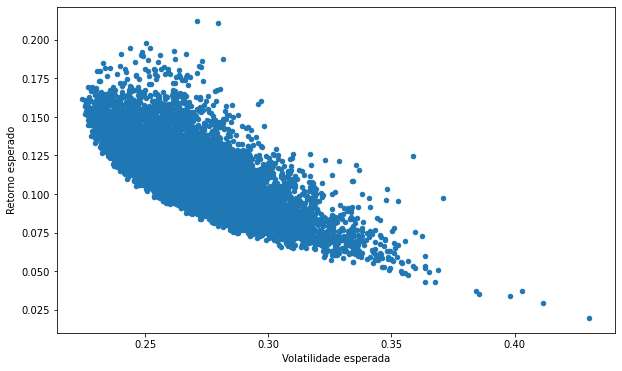

In [261]:
portfolios.plot(x='Volatilidade', y='Retorno', kind='scatter', figsize=(10,6))
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

<function matplotlib.pyplot.show>

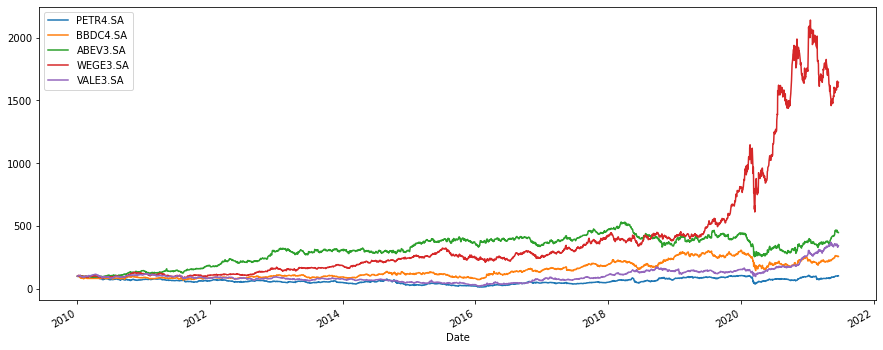

In [262]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

<function matplotlib.pyplot.show>

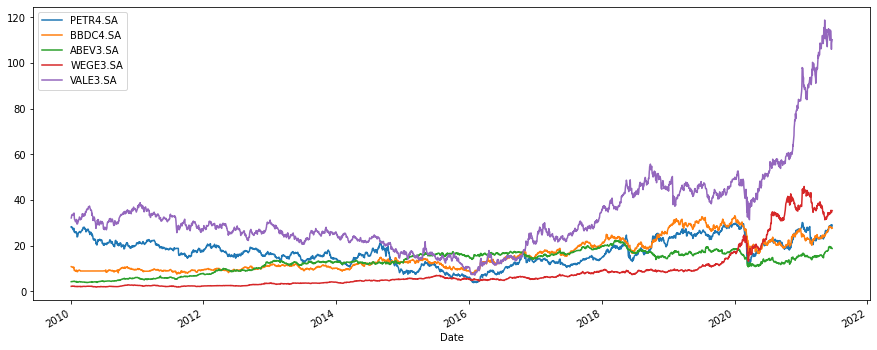

In [263]:
bolsas.plot(figsize = (15, 6));
plt.show

# CAPM

### Medindo o Beta
### Mede o risco de mercado que não pode ser evitado através da diversificação.
### Quanto mais volátil uma ação, maior seu beta. O beta varia entre -1 e 2.
### B = 0 nenhuma relação; B < 1 defensiva; B > 1 agressiva
### Ações defensivas perdem menos quando a economia está mal e ganham menos quando estão bem; agressivas são o oposto.

In [264]:
tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA','^BVSP']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

In [265]:
sec_returns = np.log( data / data.shift(1))

In [266]:
cov = sec_returns.cov() * 250
cov

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,0.290645,0.127447,0.059380,0.069724,0.128778,0.115639
BBDC4.SA,0.127447,0.144017,0.052306,0.051400,0.072504,0.086321
ABEV3.SA,0.059380,0.052306,0.078153,0.040230,0.037345,0.045963
WEGE3.SA,0.069724,0.051400,0.040230,0.125119,0.042079,0.052815
VALE3.SA,0.128778,0.072504,0.037345,0.042079,0.241928,0.079755
^BVSP,0.115639,0.086321,0.045963,0.052815,0.079755,0.072849


In [267]:
# Covariação da primeira ação com o mercado.

cov_with_market = cov.iloc[0,5]
cov_with_market

0.1156390057792526

In [268]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

0.07284938427602719

In [269]:
logn_beta = cov_with_market / market_var
logn_beta

1.5873710797759801

In [270]:
# Covariação da seegunda ação com o mercado.

cov_with_market = cov.iloc[1,5]
cov_with_market

0.08632052682638632

In [271]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

0.07284938427602719

In [272]:
vvar_beta = cov_with_market / market_var
vvar_beta

1.1849177269545177

# Modelo de Precificação de Ativos Financeiros (CAPM)

### Ação livre de risco = retorno de 2,5%.
### Beta
### Prêmio de risco das ações = entre 4,5% e 5,5%
### Retorno esperado para valer a pena investir na ação


In [273]:
logn_er = 0.025 + logn_beta * 0.05
logn_er

0.10436855398879902

In [274]:
vvar_beta = 0.025 + vvar_beta * 0.05
vvar_beta

0.0842458863477259

### Se o retorno ficar abaixo do calculado, não vale a pena investir nessa ação.

# Índice de Sharp
## Decidir o melhor portfólio em termos de risco e retorno

In [275]:
sharpe_logn = (logn_er - 0.025) / (sec_returns['PETR4.SA'].std() * 250 ** 0.5)
sharpe_logn

0.14721997763904335

In [276]:
sharpe_vvar = (logn_er - 0.025) / (sec_returns['BBDC4.SA'].std() * 250 ** 0.5)
sharpe_vvar

0.20914221587425225

# Simulações de Monte Carlo
### Observar os possíveis diferentes resultados de um evento futuro
### 1 - Prever o preço da ação

In [277]:
log_returns_1 = np.log(1 + data['BBDC4.SA'].pct_change())

In [278]:
log_returns_1.tail()

Date
2021-06-15    0.000716
2021-06-16    0.004998
2021-06-17   -0.004283
2021-06-18   -0.018409
2021-06-21    0.007983
Name: BBDC4.SA, dtype: float64

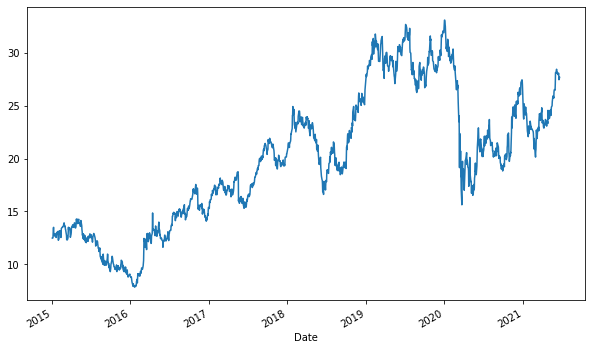

In [279]:
data['BBDC4.SA'].plot(figsize=(10,6))

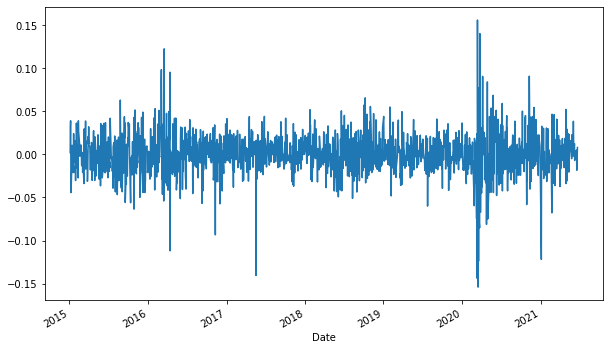

In [280]:
log_returns_1.plot(figsize=(10,6))

In [281]:
u = log_returns_1.mean()
u

0.0004971367925859643

In [282]:
var = log_returns_1.var()
var

0.0005760676894398897

In [283]:
drift = u - (0.5 * var)
drift

0.00020910294786601947

In [284]:
stdev = log_returns_1.std()
stdev

0.024001410155236498

In [285]:
type(drift)

float

In [286]:
type(stdev)

float

In [287]:
np.array(drift)

array(0.0002091)

In [288]:
np.array(stdev)

array(0.02400141)

In [289]:
norm.ppf(0.95)

1.6448536269514722

In [290]:
x = np.random.rand(10,2)
x

array([[0.53070458, 0.37530409],
       [0.30975414, 0.56541606],
       [0.06152612, 0.05587578],
       [0.17746478, 0.42752269],
       [0.02351769, 0.45698819],
       [0.06297463, 0.90119615],
       [0.49489044, 0.53933735],
       [0.86865006, 0.00602697],
       [0.14069971, 0.39543389],
       [0.31714628, 0.51860811]])

In [291]:
norm.ppf(x)

array([[ 0.07704112, -0.31783754],
       [-0.49654735,  0.16471555],
       [-1.54208785, -1.59036945],
       [-0.92506987, -0.18268476],
       [-1.98598153, -0.10802434],
       [-1.5302726 ,  1.2883973 ],
       [-0.01280812,  0.09876445],
       [ 1.12003258, -2.51056113],
       [-1.07718098, -0.26518392],
       [-0.47569378,  0.04666053]])

In [292]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-1.54248985, -0.51826794],
       [-0.45995275,  0.96041241],
       [ 0.83321055,  0.19307088],
       [ 0.33164998,  0.22972898],
       [ 0.97747002, -0.98618939],
       [-0.04330297, -0.37775244],
       [ 1.11962516,  0.06768987],
       [-1.35600158,  0.89992046],
       [-0.36094892, -0.06442894],
       [ 0.51254173, -0.33718085]])

In [293]:
t_intervals = 100
iterations = 10

In [294]:
daily_returns = np.exp(np.array(drift) + np.array(stdev) * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.00464559, 1.03338707, 0.99277306, 1.03219642, 1.03202125,
        1.00278252, 1.00307565, 1.00566529, 1.02648195, 0.9912156 ],
       [1.03225088, 1.02307994, 1.01464603, 0.99219462, 1.02325355,
        0.96575686, 1.01744891, 0.99381284, 1.00866449, 1.00039786],
       [1.00596498, 0.99693568, 1.00844571, 1.00542415, 1.04402667,
        0.97828034, 0.9704325 , 1.02560607, 1.02680894, 1.00316003],
       [0.99440663, 1.00585306, 1.02528591, 1.00805569, 0.99780526,
        1.01751151, 0.99806734, 1.02301769, 0.99382215, 0.99598667],
       [1.02461733, 1.00047372, 1.05093591, 1.03547583, 0.99123614,
        1.0062417 , 1.0433108 , 0.95616351, 1.03304489, 0.96490638],
       [0.98068334, 1.01333161, 1.00896711, 1.03759791, 1.03619473,
        1.00034786, 0.97901791, 0.99957494, 1.00102351, 0.98900753],
       [0.99273755, 1.00080237, 0.98400596, 1.04917089, 1.00366364,
        1.01228116, 1.0186503 , 0.99191873, 1.03222507, 1.02519821],
       [0.98443034, 0.9765368 , 0.9766216

In [295]:
s0 = data['BBDC4.SA'].iloc[-1]
s0

27.670000076293945

In [296]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [297]:
price_list[0] = s0
price_list

array([[27.67000008, 27.67000008, 27.67000008, 27.67000008, 27.67000008,
        27.67000008, 27.67000008, 27.67000008, 27.67000008, 27.67000008],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [298]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [299]:
price_list

array([[27.67000008, 27.67000008, 27.67000008, 27.67000008, 27.67000008,
        27.67000008, 27.67000008, 27.67000008, 27.67000008, 27.67000008],
       [28.56238191, 28.30862215, 28.0752557 , 27.4540253 , 28.31342582,
        26.72249227, 28.15281135, 27.49880122, 27.9097464 , 27.68100883],
       [28.73275605, 28.22187541, 28.31237125, 27.60294009, 29.55997181,
        26.14208873, 27.32040306, 28.20293755, 28.65797709, 27.76848171],
       [28.57204301, 28.38705961, 29.02827534, 27.82530069, 29.4950954 ,
        26.59987622, 27.26760199, 28.852104  , 28.48093233, 27.6570376 ],
       [29.27541038, 28.40050722, 30.50685707, 28.81242636, 29.23660446,
        26.76590477, 28.44858357, 27.58732904, 29.42208173, 26.68645205],
       [28.70990735, 28.77913172, 30.78041549, 29.89571336, 30.29481544,
        26.77521548, 27.85167284, 27.57560264, 29.4521954 , 26.39310197],
       [28.50140321, 28.80222323, 30.28811219, 31.36571221, 30.40580479,
        27.10404606, 28.37111477, 27.35275679

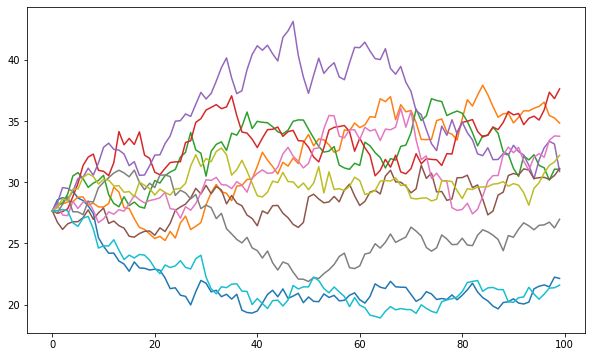

In [300]:
plt.figure(figsize=(10,6))
plt.plot(price_list)